<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/udemy-dl/NeuralNetworkMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3 Submission

Submission By : Nitin Sharma

Roll No : 202IT017

# Required Imports

In [36]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.optimizers import SGD

# Load Inbuilt Dataset from Keras

* This MNIST dataset contains a collection of handwritten numerical digits (0-9) as 28x28-sized greyscale images. 
* These images have been size-normalized and centered in a fixed-size image. 
* It provides a total 70,000 examples, divided into a test set of 10,000 images and a training set of 60,000 images.
* We will carve out a validation set of 10,000 images from the MNIST training set, and use the remaining 50,000 examples for training.



In [37]:
(X_Train,Y_Train),(X_Test,Y_Test)=mnist.load_data()
print("Train Data : \t", X_Train.shape)
print("Test Data : \t", Y_Train.shape)
print("Train Output : \t", X_Test.shape)
print("Test Output : \t", Y_Test.shape)

Train Data : 	 (60000, 28, 28)
Test Data : 	 (60000,)
Train Output : 	 (10000, 28, 28)
Test Output : 	 (10000,)


# Visualize Data
* Numerical digits (0-9) as 28x28-sized greyscale images. 

Output Value :  5


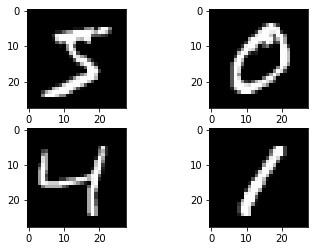

In [38]:
print("Output Value : ", Y_Train[0])
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_Train[0],cmap='gray')
axarr[0,1].imshow(X_Train[1],cmap='gray')
axarr[1,0].imshow(X_Train[2],cmap='gray')
axarr[1,1].imshow(X_Train[3],cmap='gray')

plt.show()

# Data Preprocessing

## Creating categorical training Output

In [39]:
print("Y-Value before categorizing : ", Y_Train[0])
Y_Train=np_utils.to_categorical(Y_Train)
Y_Test=np_utils.to_categorical(Y_Test)
print("Y-Value after categorizing : ", Y_Train[0])

Y-Value before categorizing :  5
Y-Value after categorizing :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Normalizaing Gray scale value

In [40]:
X_Train=X_Train/255
X_Test=X_Test/255
print(X_Train[5,15:20,15:20])

print("After PreProcessing Train Data : \t", X_Train.shape)
print("After PreProcessing Test Data : \t", Y_Train.shape)
print("After PreProcessing Train Output : \t", X_Test.shape)
print("After PreProcessing Test Output : \t", Y_Test.shape)

[[0.94901961 0.98823529 0.98823529 0.90588235 0.45882353]
 [0.81568627 0.98823529 0.98823529 0.98823529 0.98823529]
 [0.99215686 0.96862745 0.50588235 0.67843137 0.98823529]
 [0.84705882 0.25490196 0.         0.05490196 0.28235294]
 [0.11372549 0.         0.         0.         0.        ]]
After PreProcessing Train Data : 	 (60000, 28, 28)
After PreProcessing Test Data : 	 (60000, 10)
After PreProcessing Train Output : 	 (10000, 28, 28)
After PreProcessing Test Output : 	 (10000, 10)


# TASK 0 : Create basic Neural Network

* We will be creating a Sequential model. What this means is that we need to create layers of NN sequentially.
* Dense network here defines that every single node of previous layer will have a weighted link to every other node of current layer.
* NN structure :
  * We are creating a input layer of 28x28=784 input nodes.
  * Each hidden layer is having 100 nodes.
  * We have an output layer consisting of 10 nodes where each node represents digit 0-9

In [41]:
# Define model architecture
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile model
sgd1 = SGD(lr=0.1) # Sets learning rate. 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd1,
              metrics=['accuracy'])
 
# Fit model on training data
h1=model.fit(X_Train, Y_Train, batch_size=32, epochs=3, verbose=1, validation_split=.1)
 
# Evaluate model on test data.
score = model.evaluate(X_Test, Y_Test, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
#classes = model.predict_classes(X_test, batch_size=32)
print(h1.history['accuracy'])
print(h1.history.keys())
print(h1.history['val_accuracy'])
print('Validation score:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.9098 - val_loss: 0.1355 - val_accuracy: 0.9612
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1292 - accuracy: 0.9610 - val_loss: 0.0971 - val_accuracy: 0.9702
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0918 - accuracy: 0.9716 - val_loss: 0.0793 - val_accuracy: 0.9758
[0.9098148345947266, 0.9609814882278442, 0.9716110825538635]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.9611666798591614, 0.9701666831970215, 0.9758333563804626]
Validation score: 0.08929310739040375
Validation accuracy: 0.9714999794960022


In [43]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# TASK 1 : Experiment with Batch-Size, Learning Rate and Hidden Layer

In [ ]:
# Training the ANN on the Training set
batches = [1, 2, 4, 6, 16, 32, 64]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
hidden_layers = [1, 2, 4, 8]

## 1.1 Experiments with batch size
Here we are doing that  Keeping the rest of the parameter values constant (and equal to the default values), adjust the values of batch size parameter in the range of(1, 2, 4, 8, 16, 32, 64) and Finding  the performance (accuracy) of the model on the validation set and plotting a trend graph


In [ ]:
batch_accuracy = {}

for batch in batches :
  # for batch in batches :
  ann=Sequential()
  ann.add(Flatten(input_shape=(28,28)))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(10,activation='softmax'))

  # Compile model
  sgd = SGD(lr=0.01)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  print("################################\n for Batch size = ", batch, " and epoch = ", 10)
  ann.fit(X_Train, Y_Train, batch_size = batch, epochs = 10)
  batch_accuracy[batch]=max(ann.history.history['accuracy'])


################################3
 for Batch size =  1  and epoch =  10
Epoch 1/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.2252 - accuracy: 0.9301
Epoch 2/10
60000/60000 [==============================] - 54s 892us/step - loss: 0.1052 - accuracy: 0.9682
Epoch 3/10
60000/60000 [==============================] - 56s 927us/step - loss: 0.0772 - accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 56s 926us/step - loss: 0.0623 - accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 55s 919us/step - loss: 0.0491 - accuracy: 0.9847
Epoch 6/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.0437 - accuracy: 0.9859
Epoch 7/10
60000/60000 [==============================] - 55s 920us/step - loss: 0.0372 - accuracy: 0.9883
Epoch 8/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0329 - accuracy: 0.9893
Epoch 9/10
60000/60000 [==============================] - 55s 921us/step

Max accuracy for  1  :  0.9910500049591064
Max accuracy for  2  :  0.9940833449363708
Max accuracy for  4  :  0.9934333562850952
Max accuracy for  6  :  0.9900500178337097
Max accuracy for  16  :  0.9800999760627747
Max accuracy for  32  :  0.9645333290100098
Max accuracy for  64  :  0.9487500190734863


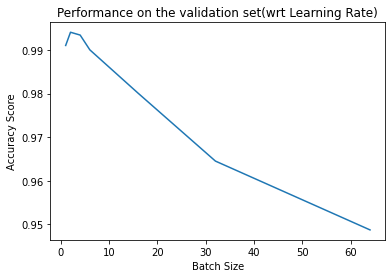

In [ ]:
#Printing max accuracies of all 
for key in batch_accuracy.keys() :
  print("Max accuracy for ", key ," : ", batch_accuracy[key])

plt.plot(list(batch_accuracy.keys()), list(batch_accuracy.values()))
plt.ylabel('Accuracy Score')
plt.xlabel('Batch Size')
plt.title('Performance on the validation set(wrt Batch Size)')
plt.show()

Observations :
1. With very small batch size, amount of time that our algo neds to train our model is very high. For eg : more than 55s per epoch in case of batch_size = 1
2. In general on increasing the batch size, the Max(training accuracy) decreases after some time. Same can be seen in graph below.

## 1.2 Experiment with Learning Rate

In [ ]:
learning_rate_accuracy = {}

for rate in learning_rate :
  # for batch in batches :
  ann=Sequential()
  ann.add(Flatten(input_shape=(28,28)))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(100,activation='relu'))
  ann.add(Dense(10,activation='softmax'))

  # Compile model
  sgd = SGD(lr=rate)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  print("################################3\n for Learning rate = ", rate, " and epoch = ", 10)
  ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)
  learning_rate_accuracy[rate]=max(ann.history.history['accuracy'])

################################3
 for Learning rate =  0.01  and epoch =  20
Epoch 1/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7086 - accuracy: 0.8178
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3257 - accuracy: 0.9065
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9209
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2405 - accuracy: 0.9301
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2151 - accuracy: 0.9380
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1942 - accuracy: 0.9438
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1772 - accuracy: 0.9484
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1628 - accuracy: 0.9526
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1507 - accuracy: 0.9560
Epoc

Max accuracy for  0.01  :  0.9589166641235352
Max accuracy for  0.05  :  0.9883333444595337
Max accuracy for  0.1  :  0.9922833442687988
Max accuracy for  0.2  :  0.9947500228881836
Max accuracy for  0.4  :  0.9901333451271057
Max accuracy for  0.8  :  0.9690166711807251


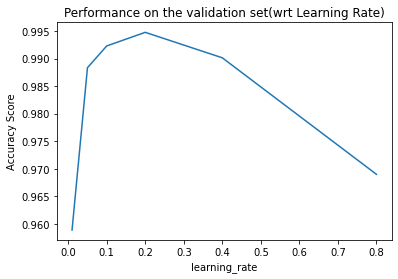

In [ ]:
# Learning Rate wise accuracies
#Printing max accuracies of all 
for key in learning_rate_accuracy.keys() :
  print("Max accuracy for ", key ," : ", learning_rate_accuracy[key])

plt.plot(list(learning_rate_accuracy.keys()), list(learning_rate_accuracy.values()))
plt.ylabel('Accuracy Score')
plt.xlabel('learning_rate')
plt.title('Performance on the validation set(wrt Learning Rate)')
plt.show()

### Observation
1. Here we observed that when learning rate is 0.2 that our model shows high accuracy of 0.99.

2. After 0.2 if we increase our learning rate, deviation from earlier trend is seen as accuracy starts decreasing. Same can be seen in the plot above


## 1.3 Experiment with number of Hidden Layers
Here we are doing that Keeping the rest of the parameter values constant , adjust the values of no of hidden layer parameter in the range of (1,2,4,6,8) and Finding the performance (accuracy) of the model on the validation set and plotting a trend graph.

In [ ]:
hidden_layers_accuracy = {}

# for batch in batches :
for i in hidden_layers :
  print("################################\n for hidden layers = ", i, " and epoch = ", 10, " and hidden layers : " , i)
  ann=Sequential()
  j = 0
  ann.add(Flatten(input_shape=(28,28)))
  while j < i :
    ann.add(Dense(100,activation='relu'))
    j=j+1
  ann.add(Dense(10,activation='softmax'))
  ann.summary()

  # Compile model
  sgd = SGD(lr=0.01)
  ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)
  hidden_layers_accuracy[i]=max(ann.history.history['accuracy'])


################################
 for hidden layers =  1  and epoch =  10  and hidden layers :  1
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7231 - accuracy: 0.8209
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3590 - accuracy: 0.9001
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0

Max accuracy for  1  :  0.9475833177566528
Max accuracy for  2  :  0.9608833193778992
Max accuracy for  4  :  0.9718166589736938
Max accuracy for  8  :  0.9790833592414856


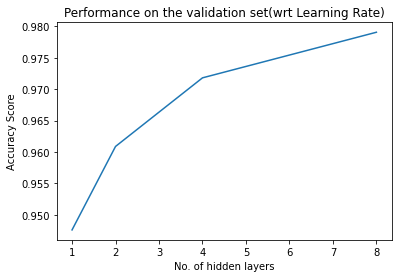

In [ ]:
# No. of hidden layer wise accuracies
#Printing max accuracies of all 
for key in hidden_layers_accuracy.keys() :
  print("Max accuracy for ", key ," : ", hidden_layers_accuracy[key])

plt.plot(list(hidden_layers_accuracy.keys()), list(hidden_layers_accuracy.values()))
plt.ylabel('Accuracy Score')
plt.xlabel('No. of hidden layers')
plt.title('Performance on the validation set(wrt Learning Rate)')
plt.show()

1. Here we observed that when number of hidden layers is 8 (total no layers is 9) that our model shows high accuracy.
2. I once also achieved even higher accuracy but that resulted in over fitting as our model tried to mimic the result.

# Task 2 : Generate confusion Matrix out of best features
For hyperparameters : batch size : 4, learning_rate = 0.2, no. of epochs : 10, hidden layers = 8

In [ ]:
print("For hyperparameters : batch size : 4, learning_rate = 0.2, no. of epochs : 10, hidden layers = 8")
ann=Sequential()
ann.add(Flatten(input_shape=(28,28)))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(100,activation='relu'))
ann.add(Dense(10,activation='softmax'))

# Compile model
sgd = SGD(lr=0.2)
ann.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
ann.fit(X_Train, Y_Train, batch_size = 40, epochs = 10)

For hyperparameters : batch size : 4, learning_rate = 0.2, no. of epochs : 10, hidden layers = 8
Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2513 - accuracy: 0.9229
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1085 - accuracy: 0.9667
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0604 - accuracy: 0.9811
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0482 - accuracy: 0.9845
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0385 - accuracy: 0.9876
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9919
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0209 - ac

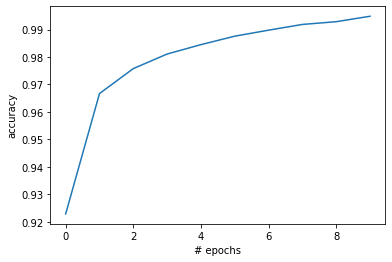

In [ ]:
plt.plot(ann.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

## Testing Test data

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(new_test_target, new_test_data)
# print(cm)
# accuracy_score(new_test_target, new_test_data)
Y_Pred = ann.predict(X_Test)
print(Y_Test.shape)
print(Y_Pred.shape)

(10000, 10)
(10000, 10)


3# Create Confusion Matrix

In [ ]:
Y_Pred = [np.argmax(i) for i in Y_Pred]
Y_Test = [np.argmax(i) for i in Y_Test]

Accuracy in Test Data :  0.9785


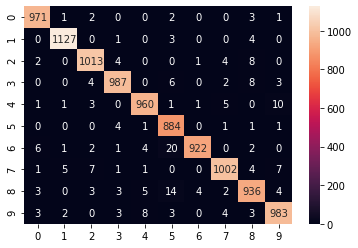

In [ ]:
cm = confusion_matrix(Y_Test, Y_Pred)
print("Accuracy in Test Data : ", accuracy_score(Y_Test, Y_Pred))

sns.heatmap(cm,  annot=True, fmt="d")

Observation : 
Here we observed that the our test accuracy is 0.9948 and 0.975 for test data. 

# TASK 3 : Overfitting 
Finding out by training the neural network on just the first 1000 of the 50,000 training examples, for 500 iterations. Showing down the loss and the accuracy on the training set as well as the test set for the trained network.

In [ ]:
XTrain = X_Train[:1000]
YTrain = Y_Train[:1000]
print("Train samples : ", XTrain.shape[0])

model_final = Sequential()
model_final.add(Flatten(input_shape=(28,28)))
model_final.add(Dense(32,activation='relu'))
model_final.add(Dense(10,activation='softmax'))
sgd_final = SGD(lr=0.4) # Sets learning rate. 
model_final.summary()

model_final.compile(loss='categorical_crossentropy', optimizer=sgd_final, metrics=['accuracy']) 
history_final = model_final.fit(XTrain, YTrain, batch_size=128, epochs=500, verbose=1, validation_data=(X_Test, Y_Test))

In [47]:
loss, accuracy  = model_final.evaluate(X_Test, Y_Test, verbose=False)
print(f'test loss: {loss:.3}')
print(f'test accuracy: {accuracy:.3}')

test loss: 0.674
test accuracy: 0.872


## Training and Testing accuracy

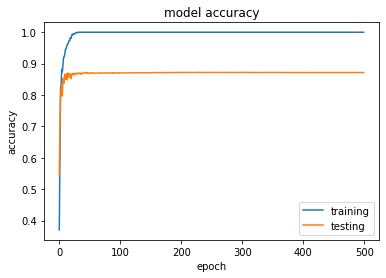

In [48]:
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'testing'], loc='best')
plt.show()


OBSERVATION : 
* Here overfitting problem occurs as we can see that as our no. of interation increasaes, training accuracy is increased up to 1.
* It means that our model extremly learn from train data but when comes to test accuracy it almost saturated at 0.87.
* It means that our model doesn't fit WELL for new data therefore here comes the generlisation error and model is not suited for predictions.

# TASK 4 : Visualizing a Neural Network

* Visualization of NN for spiral dataset
For getting test loss<=0.07 , following consideration has been followed
  * Learning rate-0.01
  * Activation -ReLU
  * #epochs-1245
  * No of hidden layers-3
  * No of neurons in each hidden layers-8
  
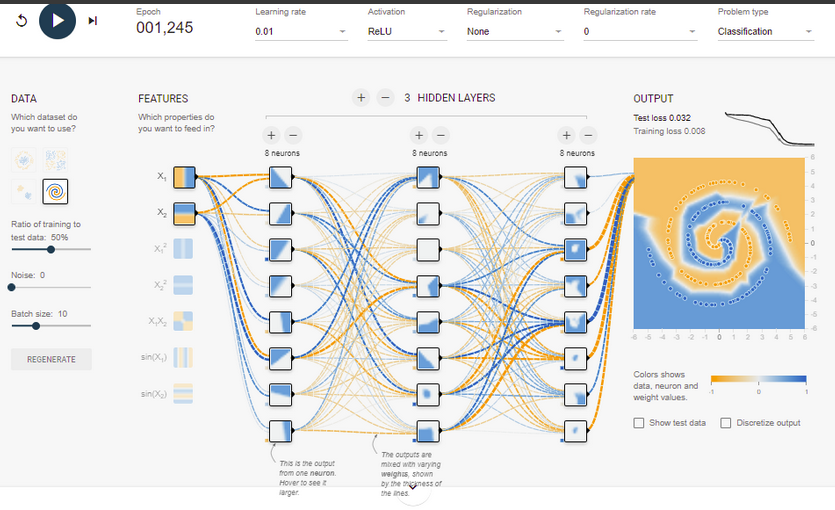


